In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\Asus\\Downloads\\Customer Churn.csv")

In [3]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(' ','0')
df['TotalCharges']=df['TotalCharges'].astype('float')

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.duplicated().sum()

0

Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [9]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [10]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


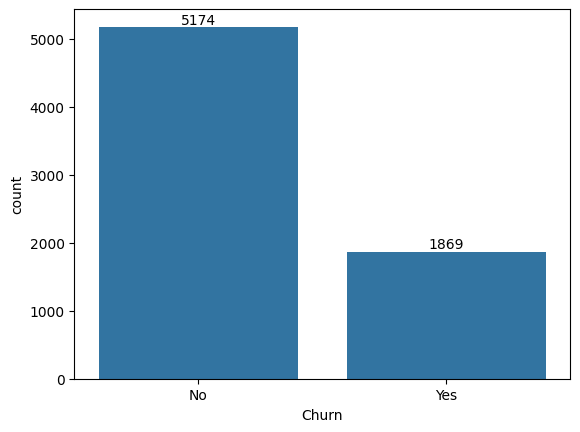

In [11]:
ax=sns.countplot(x=df['Churn'])
ax.bar_label(ax.containers[0])
plt.show()

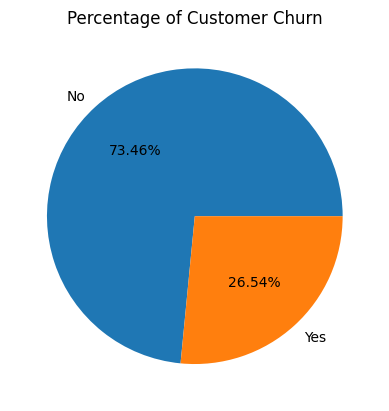

In [12]:
gb=df.groupby('Churn').agg({'Churn':'count'})
plt.title('Percentage of Customer Churn')
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
plt.show()

 From the given pie chart we can conclude that 26.54% of our customers have churned out. 
Not let's explore the reason behimd it  

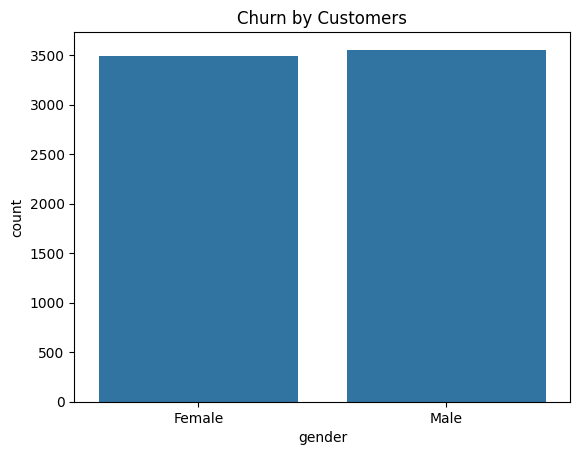

In [13]:
sns.countplot(x='gender',data=df)
plt.title('Churn by Customers')
plt.show()

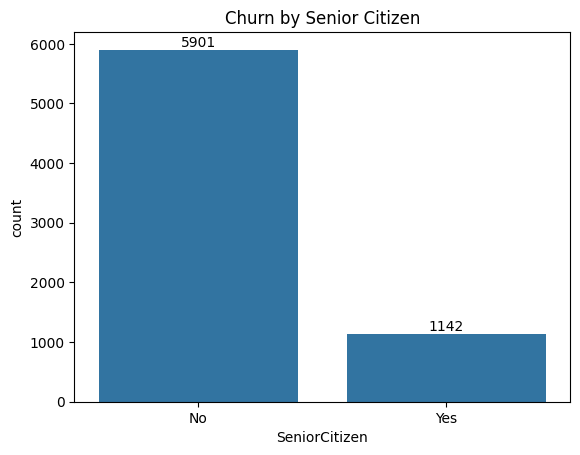

In [14]:
ax=sns.countplot(x='SeniorCitizen',data=df)
plt.title('Churn by Senior Citizen')
ax.bar_label(ax.containers[0])
plt.show()

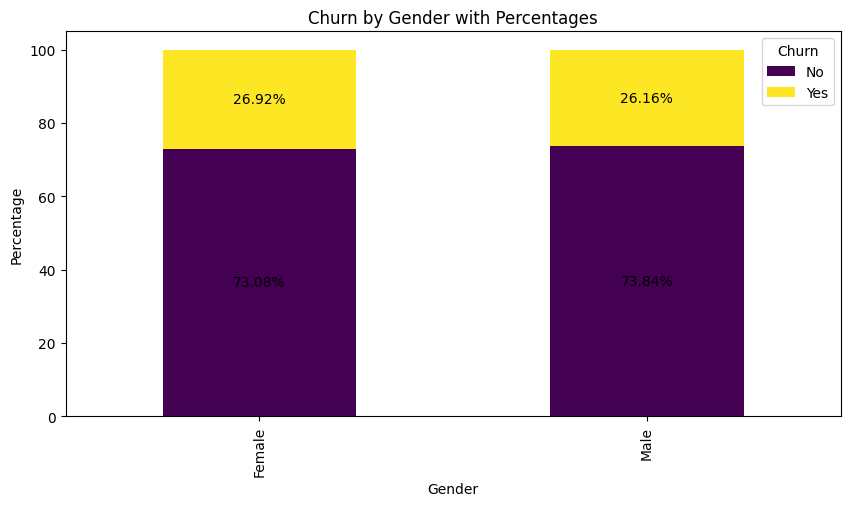

In [15]:
import matplotlib.pyplot as plt

# Group by gender and churn, then count the occurrences
churn_counts = df.groupby(['gender', 'Churn']).size().unstack()

# Calculate the percentages
churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 5), colormap="viridis")

# Add percentage labels on each bar segment
for container in ax.containers:
    # Get total of each bar
    total = container.datavalues.sum()
    ax.bar_label(container, labels=[f'{v:.2f}%' for v in container.datavalues], label_type='center')

plt.title('Churn by Gender with Percentages')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')


Comaparative a grater percentage of people in senior citizen category have churned

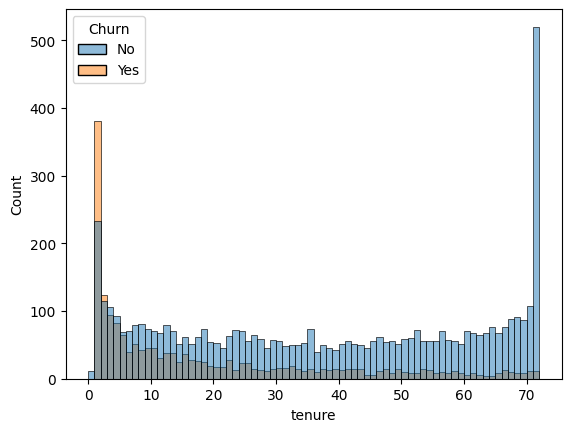

In [16]:
sns.histplot(x='tenure',bins=72,data=df,hue='Churn')
plt.show()

People who have used our services for a long time have stayed and people who have used our services #1 or #2 months have churned 

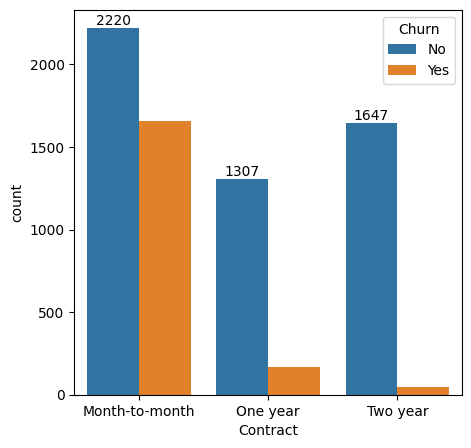

In [17]:
plt.figure(figsize = (5,5))
ax=sns.countplot(x=df['Contract'],data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract 

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

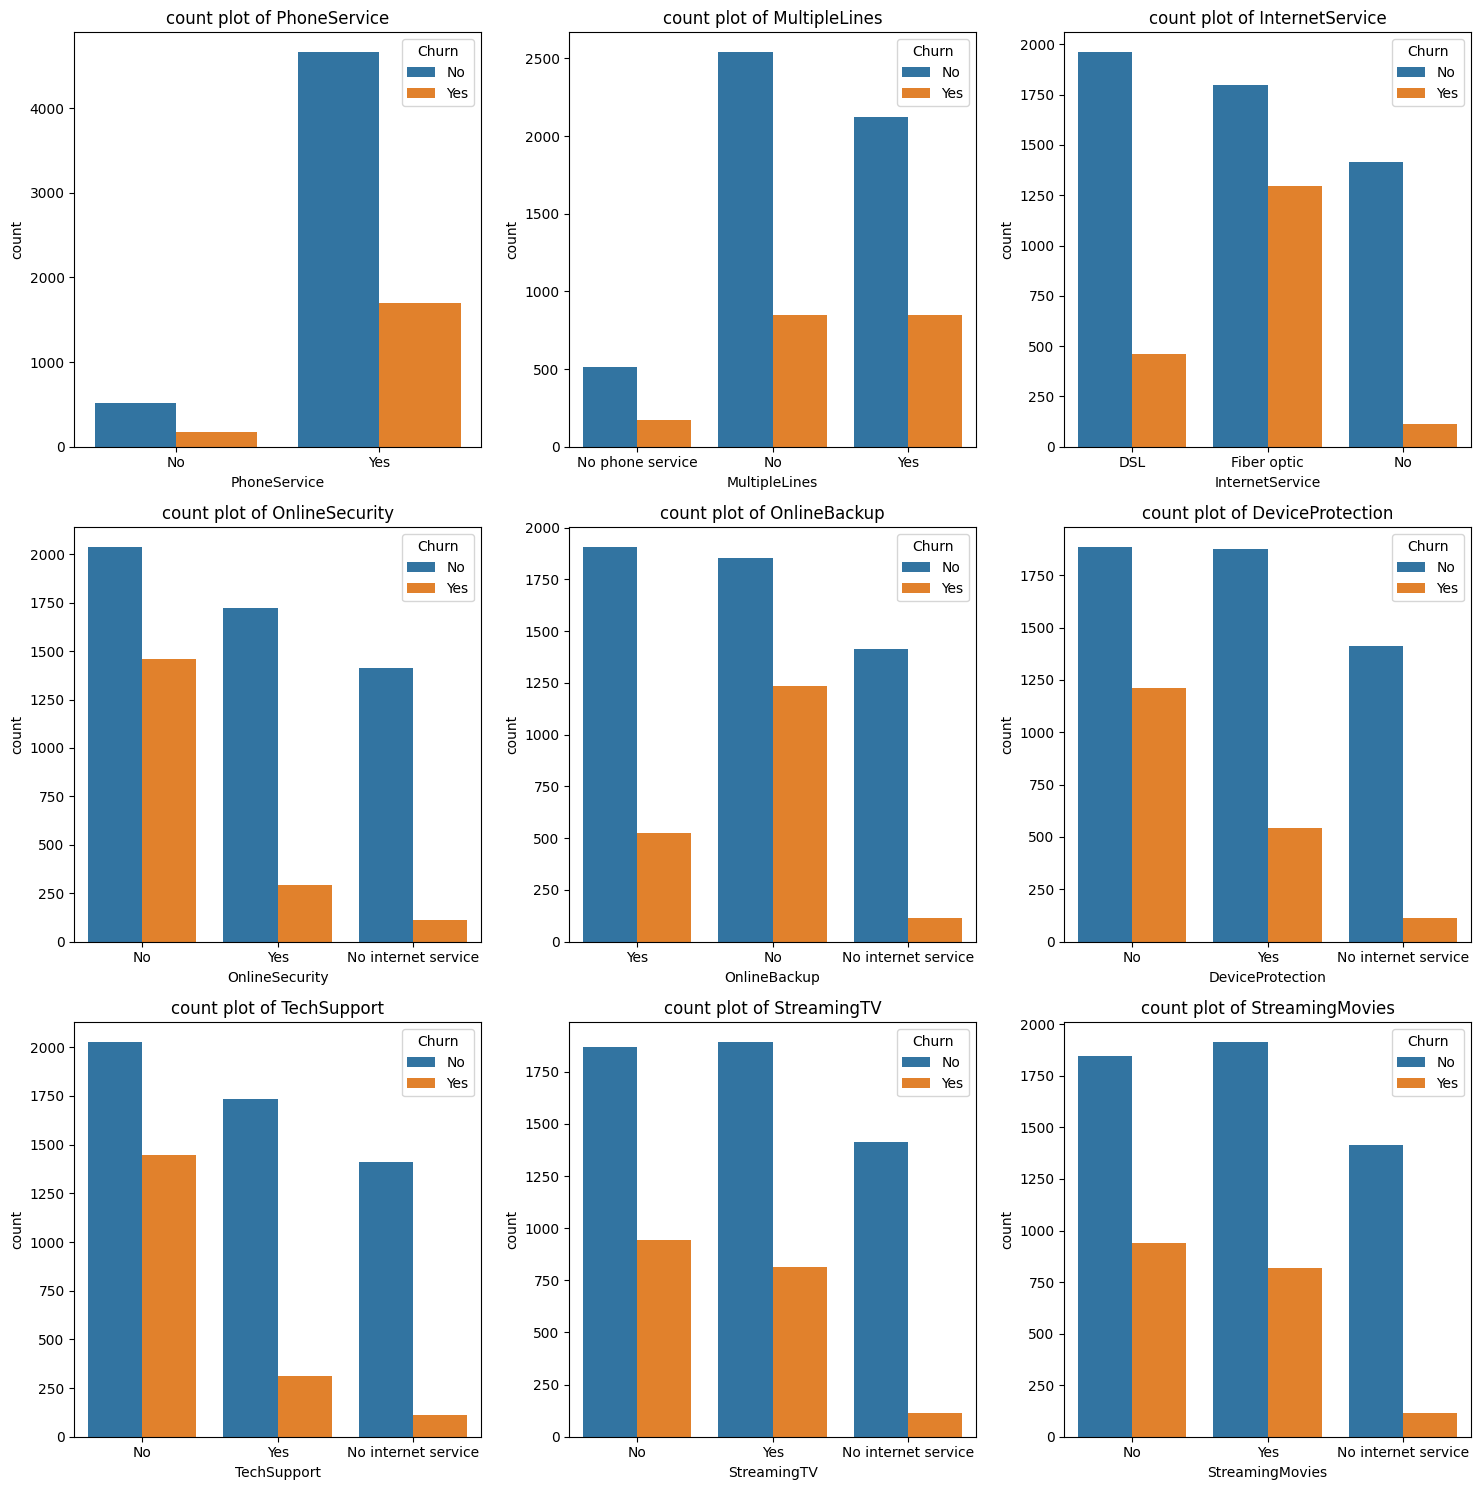

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of column names
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure with a 3x3 grid of subplots
plt.figure(figsize=(15, 15))


# Loop over the columns and create a subplot for each
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid and select each subplot
    sns.countplot(x=column, data=df,hue='Churn')  # Create countplot for the column
    plt.title(f'count plot of {column}')  # Set title to the column name

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Each subplot represents a feature (e.g., PhoneService, MultipleLines, InternetService) and has bars for churned and non-churned customers, colored by churn status (Yes/No). The plots reveal differences in churn rates based on whether a customer uses certain services, providing a visual comparison of churn behavior across service types.


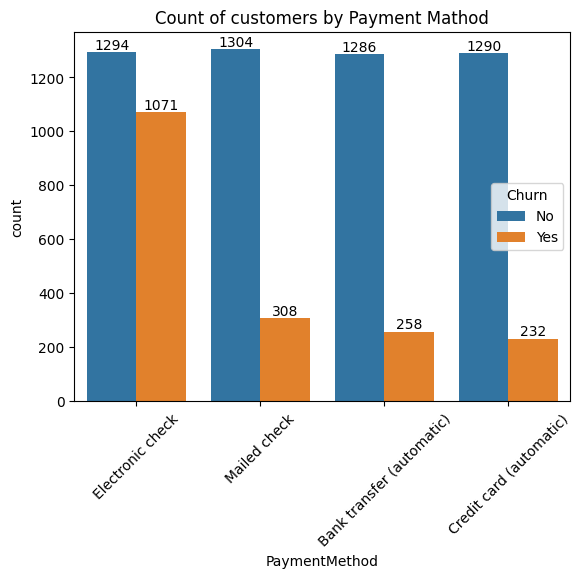

In [20]:
ax=sns.countplot(x=df['PaymentMethod'],data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title('Count of customers by Payment Mathod' )
plt.show()

Customer is likely to churn  when he is usimng electronic check as a payment method.

## DATA PROCESSING FOR PREDICT

In [21]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [22]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
# df.drop(columns=['customerID','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
#                  'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies','PaperlessBilling'],inplace=True)

In [24]:
data=df[['tenure','Contract','MonthlyCharges','TotalCharges','PaymentMethod','InternetService','TechSupport','OnlineSecurity','Churn']]

In [25]:
data.head(2)

,tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,InternetService,TechSupport,OnlineSecurity,Churn
0,1,Month-to-month,29.85,29.85,Electronic check,DSL,No,No,No
1,34,One year,56.95,1889.50,Mailed check,DSL,No,Yes,No


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_enc=LabelEncoder()

In [28]:
categorical_column=['Contract','PaymentMethod','InternetService','TechSupport','OnlineSecurity','Churn']
data[categorical_column]=data[categorical_column].apply(label_enc.fit_transform)

In [29]:
data.head(2)

,tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,InternetService,TechSupport,OnlineSecurity,Churn
0,1,0,29.85,29.85,2,0,0,0,0
1,34,1,56.95,1889.50,3,0,0,2,0


In [30]:
data.isnull().sum()

tenure             0
Contract           0
MonthlyCharges     0
TotalCharges       0
PaymentMethod      0
InternetService    0
TechSupport        0
OnlineSecurity     0
Churn              0
dtype: int64

In [31]:
X=data[['tenure','Contract','MonthlyCharges','TotalCharges','PaymentMethod','InternetService','TechSupport','OnlineSecurity']]
y=data['Churn']

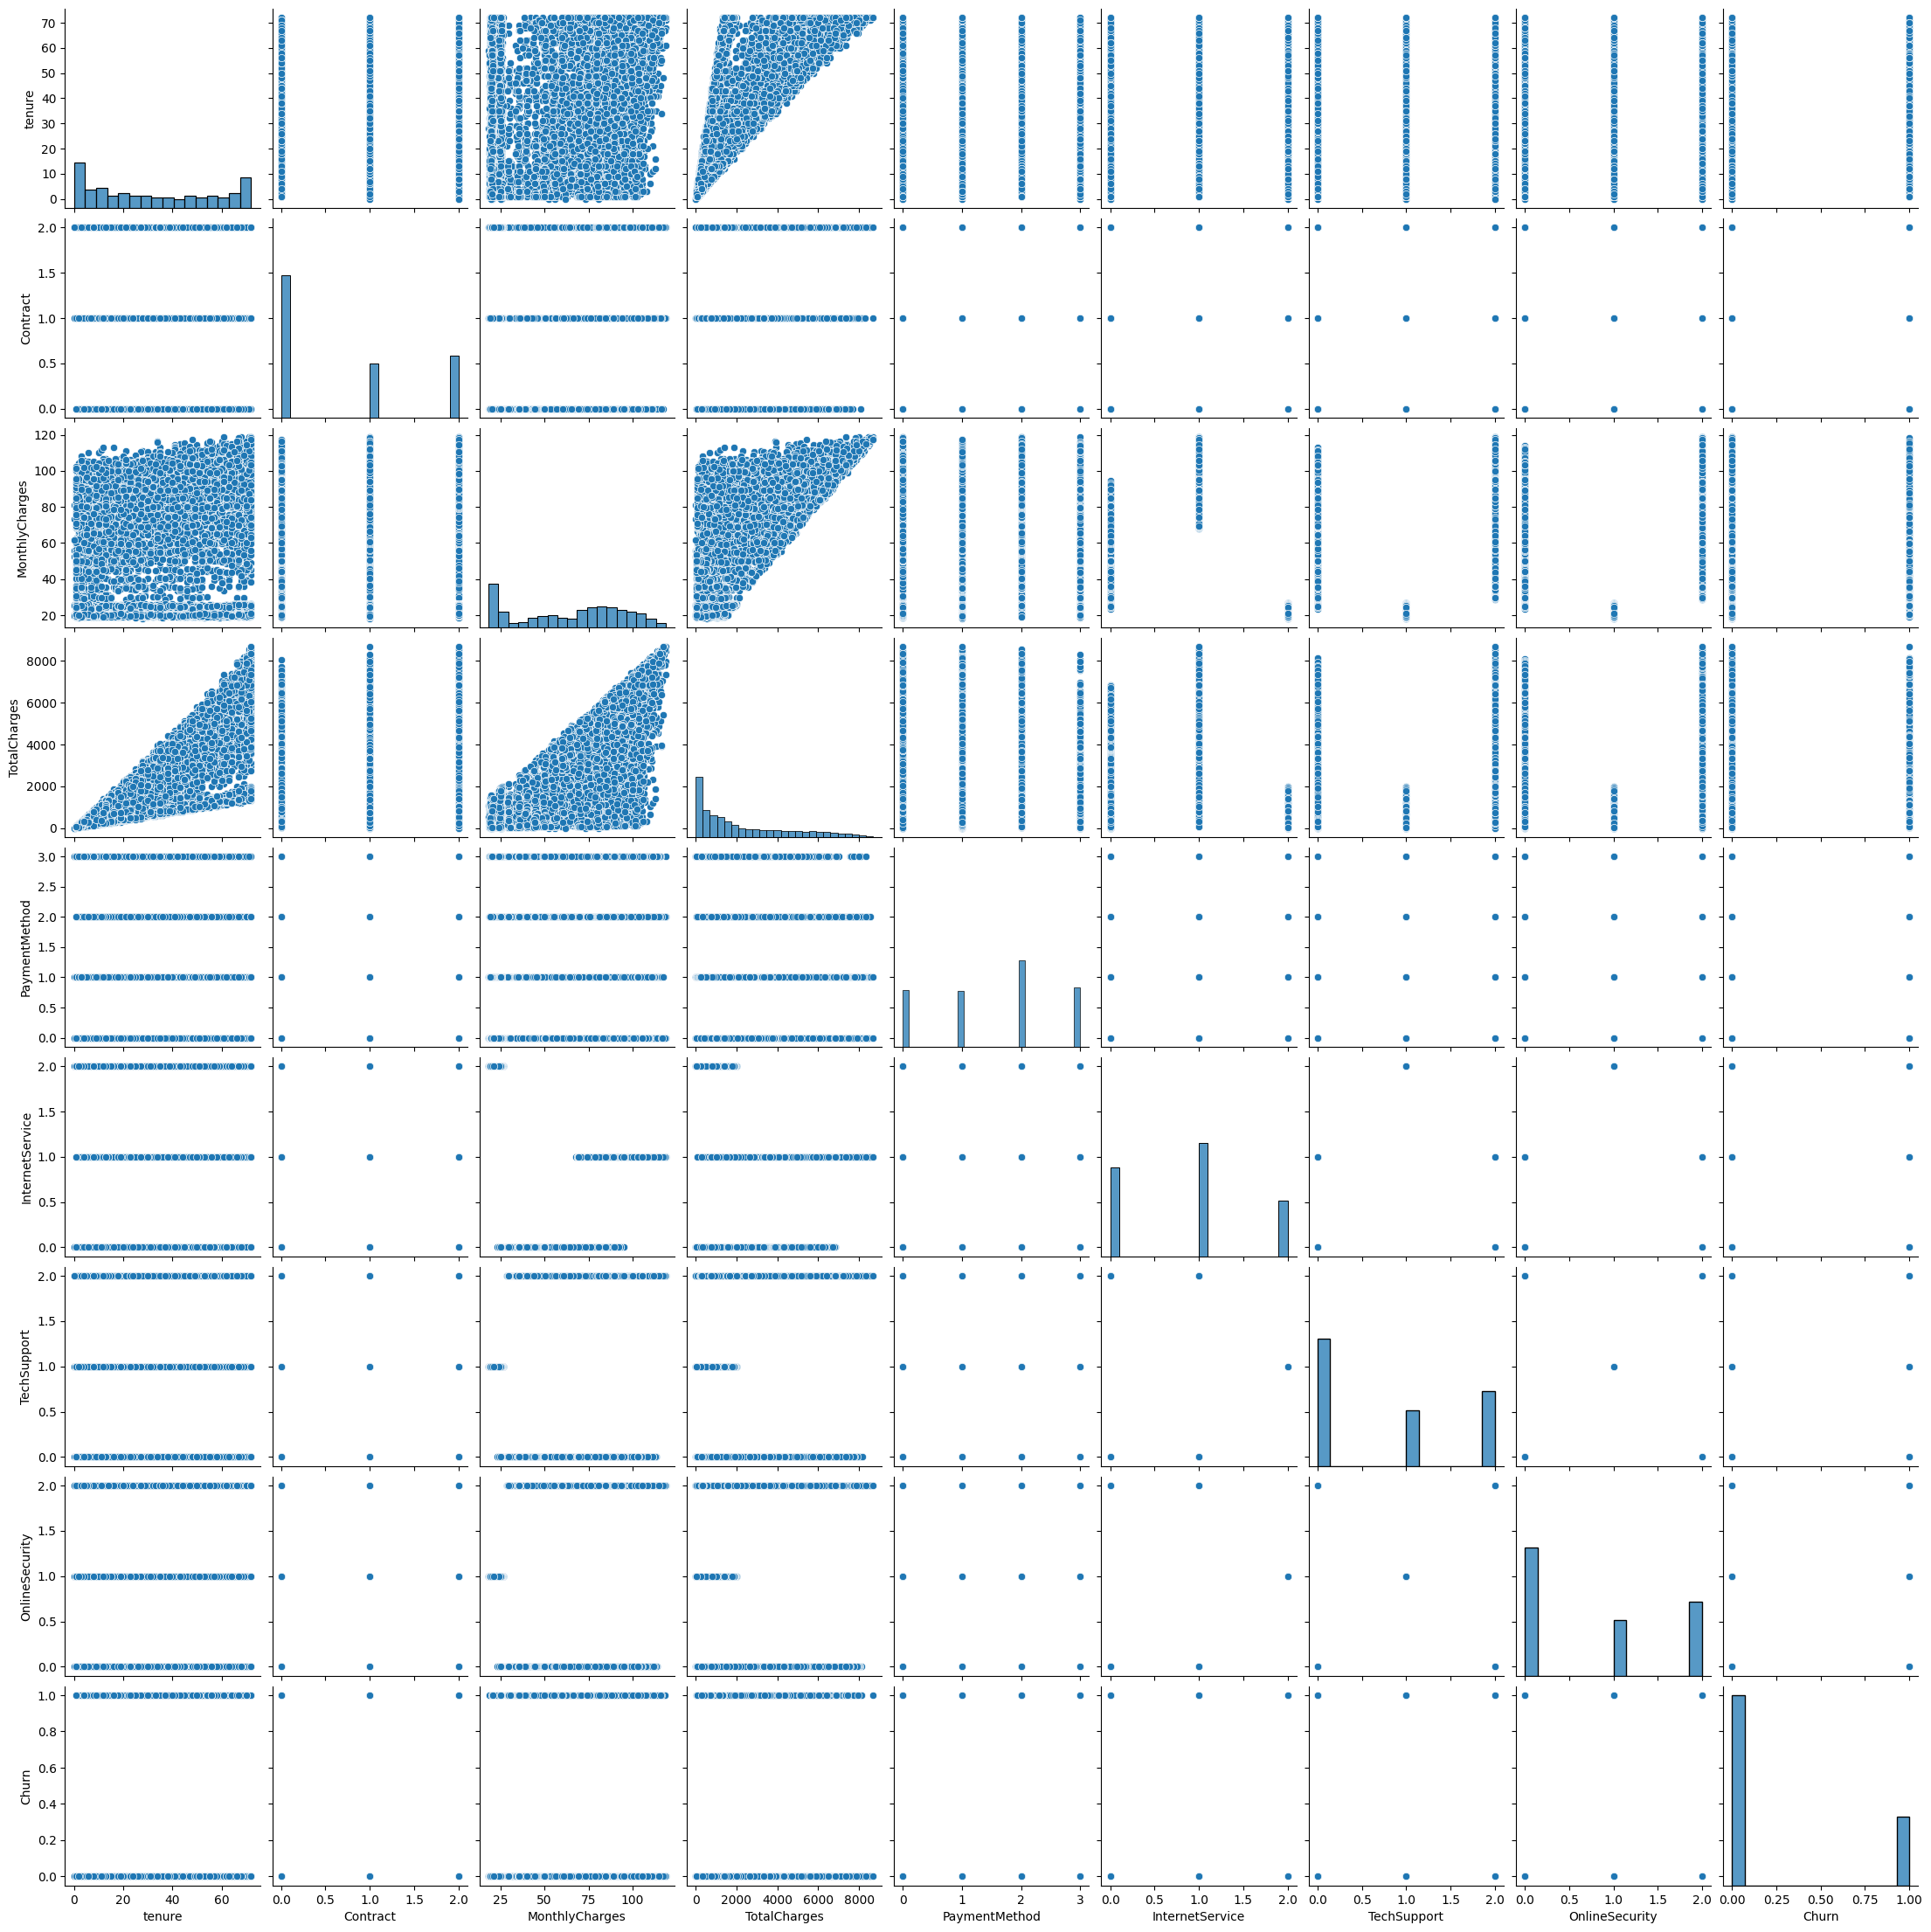

In [32]:
sns.pairplot(data)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler=StandardScaler()

In [101]:
X=scaler.fit_transform(X)

In [102]:
from sklearn.linear_model import LogisticRegression


In [103]:
lr=LogisticRegression()

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Lasso (L1) or Ridge (L2)
    "solver": ["liblinear"]  # Supports L1 and L2 regularization
}

In [106]:
gd=GridSearchCV(lr,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [107]:
gd.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [108]:
y_pred=gd.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(y_test,y_pred)

0.7917652626597255

In [133]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [134]:
confusion_matrix(y_test,y_pred)

array([[1367,  172],
       [ 268,  306]], dtype=int64)

In [135]:
precision_score(y_test,y_pred)

0.6401673640167364

In [136]:
recall_score(y_test,y_pred)

0.5331010452961672

In [137]:
f1_score(y_test,y_pred)

0.5817490494296578